In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
churn_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv')
churn_df.head(2)

PRE-PROCESAMIENTO

In [5]:
churn_df = churn_df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head(2)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1


In [6]:
x = np.asarray(churn_df[['tenure','age','address','income','ed','employ','equip']])
y = np.asarray(churn_df['churn'])

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

TRAIN/TEST

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print(f'Train set: {x_train.shape}, {y_train.shape}')
print(f'Test set: {x_test.shape}, {y_test.shape}')

Train set: (160, 7), (160,)
Test set: (40, 7), (40,)


MODELADO DE REGRESION LOGISTICA

In [13]:
# Librerias para optimizar: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
# Parametro 'C': Define la fuerza de regularizacion, cuanto mas pequeño el valor mas fuerte la regularizacion

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
yhat = LR.predict(x_test)
print(yhat)

# 'predict_proba' devuelve los estimados para las clases
# Columna 1: Probabilidad de clase 0, P(Y=0|X)
# Columna 2: Probabilidad de la clase 1, P(Y=1|X)

yhat_prob = LR.predict_proba(x_test)
yhat_prob[0:5]

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0]


array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161]])

EVALUACION

Matriz de confusion sin normalizacion
[[ 6  9]
 [ 1 24]]


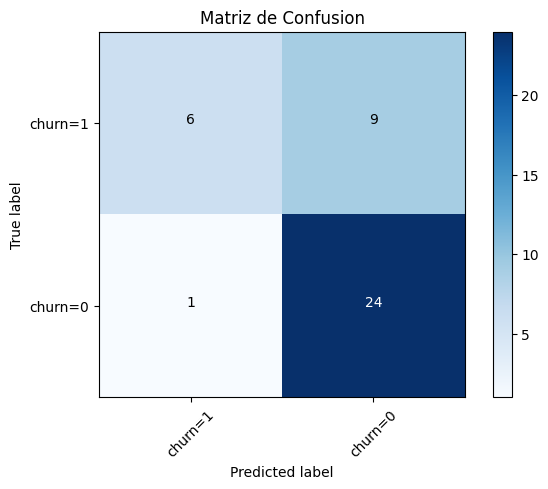

In [21]:
# jaccard_score es la division entre el tamaño de la interseccion y el tamaño de la union de dos conjuntos de etiquetas
# Si el conjunto predijo concuerda con el conjunto real de etiquetas, entonces la presicion es 1, de otro modo es 0
from sklearn.metrics import jaccard_score

jaccard_score(y_test,yhat,pos_label=0)

from sklearn.metrics import classification_report,confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Matriz de Confusion',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Matriz de confusion normalizada")
    else:
        print("Matriz de confusion sin normalizacion")
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment="center",color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#print(confusion_matrix(y_test,yhat,labels=[1,0]))

cnf_matrix = confusion_matrix(y_test,yhat,labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['churn=1','churn=0'],normalize=False,title='Matriz de Confusion')

# True positives, false positives, true negatives, and false negatives
# Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)
# Recall is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

In [22]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [23]:
# Mide el rendimiento de un clasificador

from sklearn.metrics import log_loss

log_loss(y_test,yhat_prob)

0.6017092478101185

In [25]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(x_train,y_train)
yhat_prob2 = LR2.predict_proba(x_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.61
